In [4]:
#import all the necessary libraries
import pandas as pd
import seaborn as sns
import operator
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [5]:
#load the dataset
covid_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-20-2020.csv")

In [6]:
#take a look at the original dataset
covid_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [7]:
#there are extra cols, let's remove them and put them in a new dataset so we are not modifying the original one
#in case we need that back in the future
covid_modified = covid_data.drop(columns=['Last_Update', 'Lat', 'Long_', 'Country_Region', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate'])

In [8]:
#let's take a look at this new one now
#this will give you a list of total confirmed, deaths and recovered cases listed by the US states and cruise ships
covid_modified

,Province_State,Confirmed,Deaths,Recovered
0,Alabama,13052,522,NaN
1,Alaska,401,10,352.0
2,American Samoa,0,0,NaN
3,Arizona,14906,747,3773.0
4,Arkansas,5003,107,3852.0
5,California,85997,3497,NaN
6,Colorado,22797,1299,3478.0
7,Connecticut,39017,3529,6264.0
8,Delaware,8194,310,3965.0
9,Diamond Princess,49,0,NaN


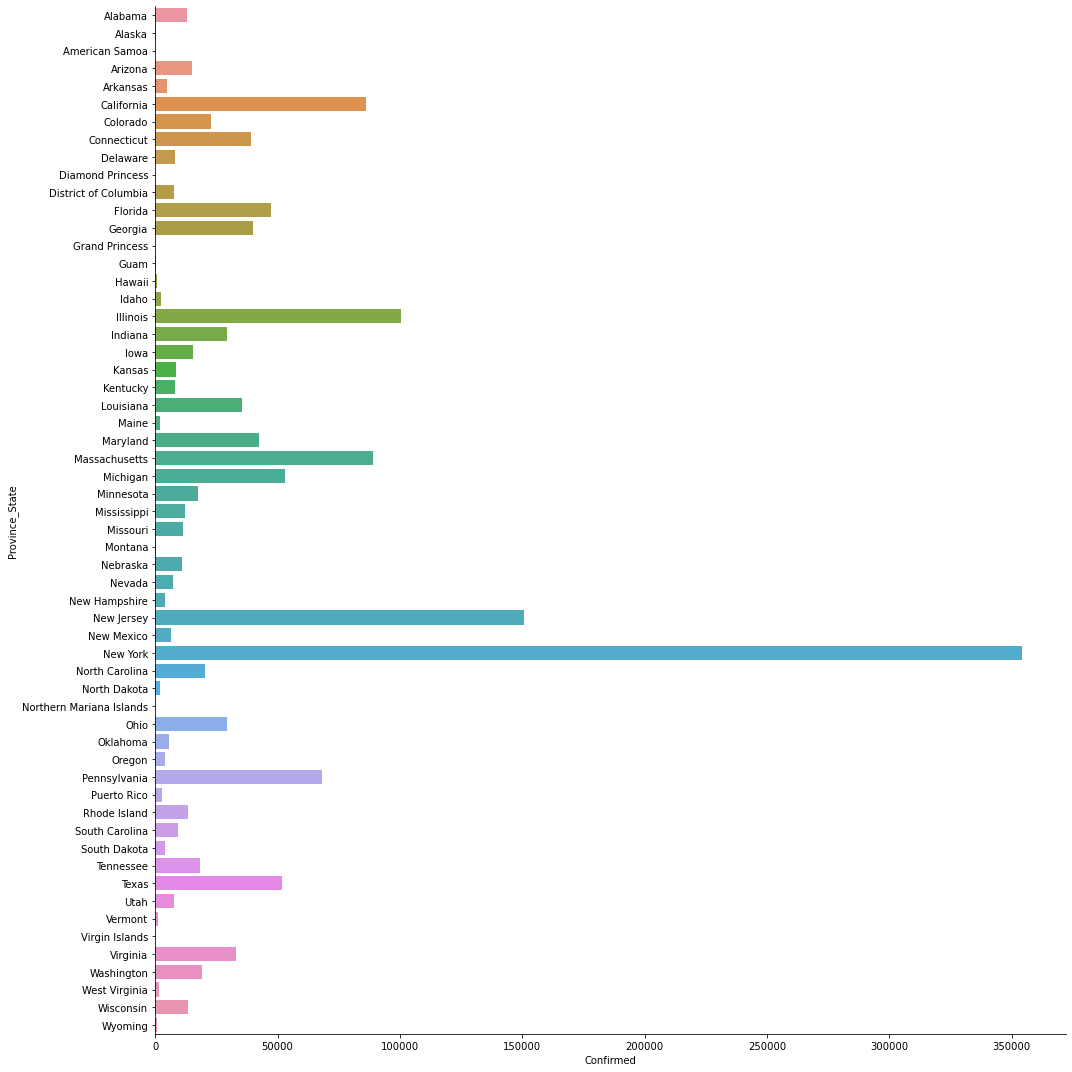

In [9]:
#since the previous list can be a bit tedious to read, let's present it in a way that is easier to read
sns.catplot(x='Confirmed',y='Province_State',data=covid_modified,kind='bar', height = 15, aspect=1)

#the same can be viewed for deaths and recovered cases, below is the code for that
#sns.catplot(x='Deaths',y='Province_State',data=covid_modified,kind='bar', height = 15, aspect=1)
#sns.catplot(x='Recovered',y='Province_State',data=covid_modified,kind='bar', height = 15, aspect=1)


In [10]:
#the last representation was a bit better and it was clear to see the New York topped the list.
#but what if you want to see the top 5 to top 10? Would the previous plot suffice? Probably not.
#so let's look at another way of presenting the list in a decreasing order.

provinces =  list(covid_modified['Province_State'])
confirmed = []
no_cases = [] 

for i in provinces:
    cases = covid_modified[covid_modified['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed.append(cases)
    else:
        no_cases.append(i)
    
# remove areas with no confirmed cases
for i in no_cases:
    provinces.remove(i)
    
provinces = [k for k, v in sorted(zip(provinces, confirmed), key=operator.itemgetter(1), reverse=True)]
for i in range(len(provinces)):
    confirmed[i] = covid_modified[covid_modified['Province_State']==provinces[i]]['Confirmed'].sum()


In [11]:
province_df = pd.DataFrame({'Province/State Name': provinces,'Number of Confirmed Cases': confirmed})

province_df.style.background_gradient(cmap='Blues')

,Province/State Name,Number of Confirmed Cases
0,New York,354370
1,New Jersey,150776
2,Illinois,100418
3,Massachusetts,88970
4,California,85997
5,Pennsylvania,68126
6,Michigan,53009
7,Texas,51673
8,Florida,47471
9,Maryland,42323


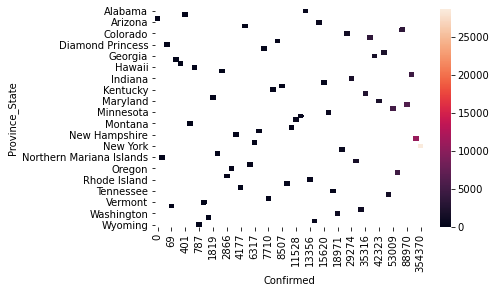

In [12]:
#another interested representation is a heatmap where it shows the deaths and confirmed cases by the states
#heatmap has the data in a matrix form
virus = covid_modified.pivot_table(values='Deaths',index='Province_State',columns='Confirmed')
sns.heatmap(virus)

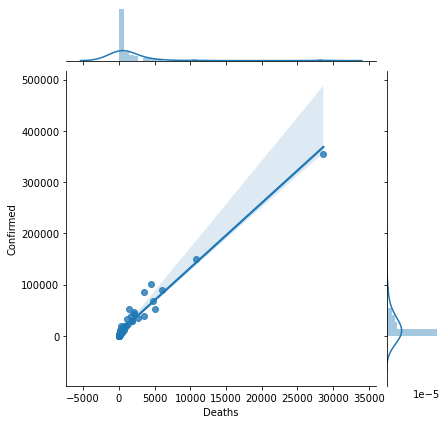

In [13]:
#grids can also be helpful way of representation
g = sns.JointGrid(x="Deaths", y="Confirmed", data=covid_modified)
g = g.plot(sns.regplot, sns.distplot)

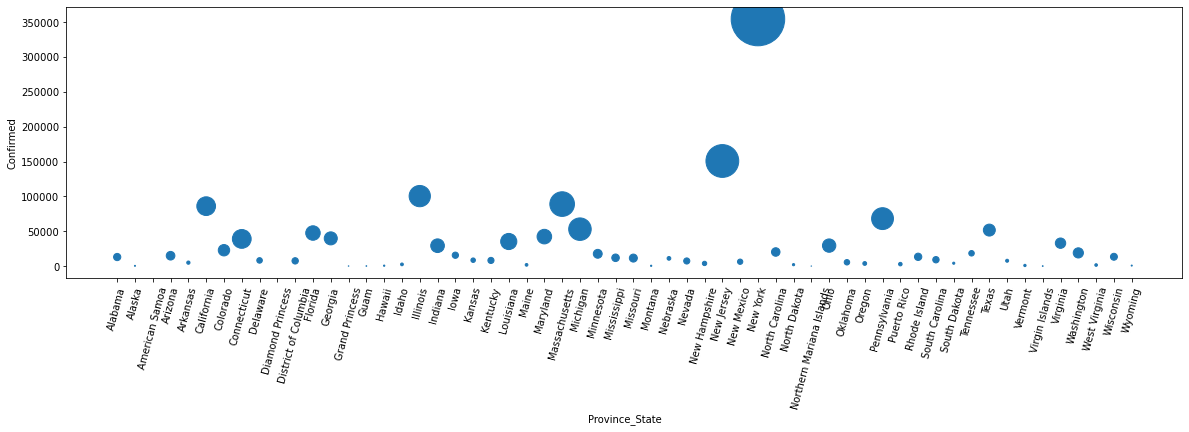

In [14]:
#shows a 3-dimensional plot, there's x vs y and the color value for size

covid_modified.plot.scatter(x="Province_State", y="Confirmed", s=covid_modified['Deaths']/10, figsize=(20, 5), rot=75)

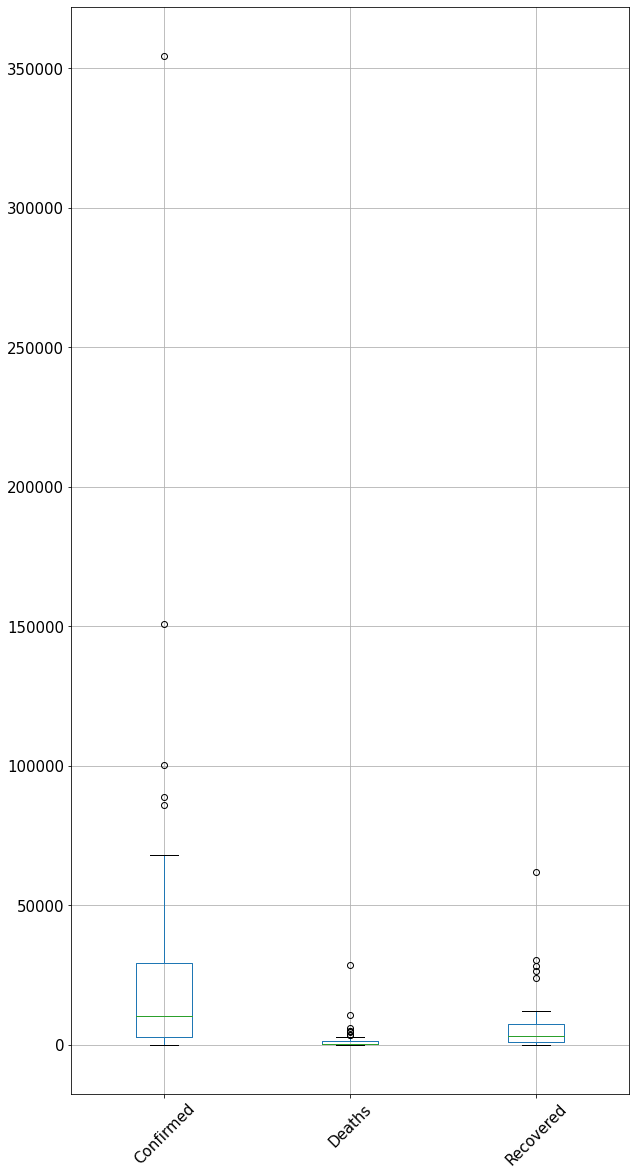

In [20]:
#takes every col as cat and plots distribution as a box plot
#shows total confirmed, deaths and recovered in US states
covid_modified.plot.box(grid=True, rot=45, fontsize=15,figsize=(10, 20))

In [42]:
covid_modified

,Province_State,Confirmed,Deaths,Recovered
0,Alabama,13052,522,NaN
1,Alaska,401,10,352.0
2,American Samoa,0,0,NaN
3,Arizona,14906,747,3773.0
4,Arkansas,5003,107,3852.0
5,California,85997,3497,NaN
6,Colorado,22797,1299,3478.0
7,Connecticut,39017,3529,6264.0
8,Delaware,8194,310,3965.0
9,Diamond Princess,49,0,NaN


In [54]:

covid_states=covid_modified.drop([2, 9, 10, 13, 14, 39, 44, 52], axis='index')
covid_states


#covid_states=covid_modified.drop(['American Samoa','Diamond Princess', 'District of Columbia', 'Grand Princess', 'Guam', 'Northern Mariana Islands', 'Puerto Rico'], axis='Province_State')

,Province_State,Confirmed,Deaths,Recovered
0,Alabama,13052,522,NaN
1,Alaska,401,10,352.0
3,Arizona,14906,747,3773.0
4,Arkansas,5003,107,3852.0
5,California,85997,3497,NaN
6,Colorado,22797,1299,3478.0
7,Connecticut,39017,3529,6264.0
8,Delaware,8194,310,3965.0
11,Florida,47471,2096,NaN
12,Georgia,39801,1697,NaN


In [55]:
def convert_state_name(name):
    cd=str(name)
    us_state_abbrev = {
    "Alabama":"AL",
    "Alaska":"AK",
    "Arizona":"AZ",
    "Arkansas":"AR",
    "California":"CA",
    "Colorado":"CO",
    "Connecticut":"CT",
    "Delaware":"DE",
    "Washington DC":"DC",
    "Florida":"FL",
    "Georgia":"GA",
    "Hawaii":"HI",
    "Idaho":"ID",
    "Illinois":"IL",
    "Indiana":"IN",
    "Iowa":"IA",
    "Kansas":"KS",
    "Kentucky":"KY",
    "Louisiana":"LA",
    "Maine":"ME",
    "Maryland":"MD",
    "Massachusetts":"MA",
    "Michigan":"MI",
    "Minnesota":"MN",
    "Mississippi":"MS",
    "Missouri":"MO",
    "Montana":"MT",
    "Nebraska":"NE",
    "Nevada":"NV",
    "New Hampshire":"NH",
    "New Jersey":"NJ",
    "New Mexico":"NM",
    "New York":"NY",
    "North Carolina":"NC",
    "North Dakota":"ND",
    "Ohio":"OH",
    "Oklahoma":"OK",
    "Oregon":"OR",
    "Pennsylvania":"PA",
    "Rhode Island":"RI",
    "South Carolina":"SC",
    "South Dakota":"SD",
    "Tennessee":"TN",
    "Texas":"TX",
    "Utah":"UT",
    "Vermont":"VT",
    "Virginia":"VA",
    "Washington":"WA",
    "West Virginia":"WV",
    "Wisconsin":"WI",
    "Wyoming":"WY"}
    return us_state_abbrev[cd]

covid_states['STATE_CD'] = covid_states.Province_State.apply(lambda x:convert_state_name(x)) 

In [56]:
covid_states

,Province_State,Confirmed,Deaths,Recovered,STATE_CD
0,Alabama,13052,522,NaN,AL
1,Alaska,401,10,352.0,AK
3,Arizona,14906,747,3773.0,AZ
4,Arkansas,5003,107,3852.0,AR
5,California,85997,3497,NaN,CA
6,Colorado,22797,1299,3478.0,CO
7,Connecticut,39017,3529,6264.0,CT
8,Delaware,8194,310,3965.0,DE
11,Florida,47471,2096,NaN,FL
12,Georgia,39801,1697,NaN,GA


In [77]:
data = dict(type='choropleth',
            colorscale='Viridis',
            reversescale= True,
            locations = covid_states['STATE_CD'],
            z = covid_states['Confirmed'],
            locationmode = 'USA-states',
            text = covid_states['Province_State'],
            marker = dict(line = dict(color = 'rgb(12,12,12)',width = 2)),
            colorbar = {'title':"COVID"}
            ) 

In [78]:
layout = dict(title = 'COVID-19 Confirmed Cases in US',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [79]:
choromap = go.Figure(data = [data],layout = layout)
plot(choromap,validate=False)

'temp-plot.html'